In [65]:
!pip install linearmodels
!pip install matplotlib
!pip install xlrd
!pip install openpyxl

You should consider upgrading via the 'C:\Users\arika\Documents\opinnot\uva\python\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\arika\Documents\opinnot\uva\python\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\arika\Documents\opinnot\uva\python\venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\arika\Documents\opinnot\uva\python\venv\Scripts\python.exe -m pip install --upgrade pip' command.


# Sources
* [Panel data regression](https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8)
* [How to build a pooled OLS regression model for panel datasets](https://towardsdatascience.com/how-to-build-a-pooled-ols-regression-model-for-panel-data-sets-a78358f9c2a)
* [Pandas for panel data](https://python.quantecon.org/pandas_panel.html)


In [1]:
import pandas as pd
from linearmodels import PooledOLS
import statsmodels.api as sm
import numpy as np

# Descriptive statistics about state-owned and privately owned banks

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_excel('RIFA-Data2016.xls', sheet_name="Bank lending")

In [4]:
df.head()

Bank  Year  STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
0   201  2005        63.76  6.209636e+07  8.731443e+07         0.830049   
1   201  2006        63.80  9.652529e+07  1.316570e+08         0.828939   
2   201  2007        60.30  1.597618e+08  2.007972e+08         0.803022   
3   201  2008        61.58  1.728323e+08  2.292849e+08         0.756741   
4   201  2009        60.75  1.608252e+08  2.349233e+08         0.790621   

   PROFIT_BT_ASSETS  COST_TO_INCOME  EQUITY_ASSETS  LLOSS_RES_ON_GLOANS  
0          3.486552          51.613       0.091945                4.950  
1          3.144802          54.839       0.088997                3.817  
2          2.835351          55.434       0.129280                2.764  
3          1.928618          49.997       0.130086                3.831  
4          0.420320          34.302       0.127377               10.651

In [5]:
# Adding the gross log loans change column.
df['DELTA_LOANS'] = np.nan
mask = df.groupby('Bank')['Year'].apply(lambda x: x.shift(1)==x-1)
df.loc[mask,'DELTA_LOANS'] = df.groupby('Bank')['LOANS'].pct_change()

In [6]:
df

Bank  Year  STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
0      201  2005    63.760000  6.209636e+07  8.731443e+07         0.830049   
1      201  2006    63.800000  9.652529e+07  1.316570e+08         0.828939   
2      201  2007    60.300000  1.597618e+08  2.007972e+08         0.803022   
3      201  2008    61.580000  1.728323e+08  2.292849e+08         0.756741   
4      201  2009    60.750000  1.608252e+08  2.349233e+08         0.790621   
5      201  2010    60.300000  1.801163e+08  2.831169e+08         0.806509   
6      201  2011    60.300000  2.397713e+08  3.365345e+08         0.803734   
7      202  2005    99.900000  2.033875e+07  3.748806e+07         0.615941   
8      202  2006    99.900000  3.264960e+07  5.847458e+07         0.613496   
9      202  2007    77.500000  7.008009e+07  1.108400e+08         0.560334   
10     202  2008    77.470000  8.698316e+07  1.258458e+08         0.403121   
11     202  2009    85.500000  7.637497e+07  1.193882e+08         0.513958   
12     202  2010    85.490000  9.139381e+07  1.407919e+08         0.608311   
13     202  2011    75.500000  1.336062e+08  2.108827e+08         0.632791   
14     203  2005    25.500000  6.290524e+06  1.534537e+07         0.518280   
15     203  2006    20.493603  1.076241e+07  2.942247e+07         0.455556   
16     203  2007    20.478870  1.634506e+07  3.864236e+07         0.522625   
17     203  2009    25.328580  2.477473e+07  5.756945e+07         0.614339   
18     203  2010    20.493603  3.390666e+07  6.403607e+07         0.682091   
19     203  2011    20.493603  4.337339e+07  7.695553e+07         0.701159   
20     204  2005   100.000000  1.534255e+06  1.981583e+06         0.374658   
21     204  2006   100.000000  5.919437e+06  7.009984e+06         0.392433   
22     204  2007   100.000000  1.187895e+07  1.452201e+07         0.441173   
23     204  2008   100.000000  1.539464e+07  2.427176e+07         0.557550   
24     204  2009   100.000000  1.932294e+07  2.746523e+07         0.508404   
25     204  2010   100.000000  2.259272e+07  3.054116e+07         0.528424   
26     204  2011   100.000000  2.806852e+07  3.989384e+07         0.543209   
27     205  2005    92.097810  1.099543e+06  1.791255e+06         0.605189   
28     205  2006    96.133770  4.526450e+06  6.040211e+06         0.708957   
29     205  2007    76.097250  9.910055e+06  1.301166e+07         0.741973   
30     205  2008    77.470000  1.474807e+07  2.030201e+07         0.640365   
31     205  2009    85.500000  1.520050e+07  2.357387e+07         0.750308   
32     205  2010    85.490000  1.586277e+07  2.966368e+07         0.809390   
33     205  2011    75.500000  2.076882e+07  3.655694e+07         0.874589   
34     207  2005    48.650000  5.671787e+06  8.538849e+06         0.771773   
35     207  2006    46.460000  9.723942e+06  1.450596e+07         0.771601   
36     207  2007    44.000000  1.432491e+07  2.151397e+07         0.791232   
37     207  2008    43.410000  1.758192e+07  2.727619e+07         0.771771   
38     207  2009    48.110000  1.845528e+07  2.728490e+07         0.785177   
39     207  2011    69.626100  2.231953e+07  3.292353e+07         0.592809   
40     208  2006     0.000000  6.188686e+06  9.376737e+06         0.855434   
41     208  2007     0.000000  1.095272e+07  1.499015e+07         0.844114   
42     208  2008     0.000000  1.359384e+07  2.027746e+07         0.797110   
43     208  2009     0.000000  1.129675e+07  1.594730e+07         0.789119   
44     208  2010     0.000000  1.267242e+07  1.886696e+07         0.783690   
45     208  2011     0.000000  1.468184e+07  2.397734e+07         0.791986   
46     209  2005     0.000000  3.948483e+06  7.402297e+06         0.752020   
47     209  2006     0.000000  6.123675e+06  1.115926e+07         0.763624   
48     209  2007     0.000000  9.508123e+06  1.662429e+07         0.755369   
49     209  2008     0.000000  1.119420e+07  1.724119e+07         0.835915   
50     209  2009     0.00000

In [13]:
# Select rows, where state-ownership is 100
state_owned = df['STATE_SHARE'] == 0
count = state_owned.value_counts()[True]
print(count)


1893


In [14]:
df.head()

Bank  Year  STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
0   201  2005        63.76  6.209636e+07  8.731443e+07         0.830049   
1   201  2006        63.80  9.652529e+07  1.316570e+08         0.828939   
2   201  2007        60.30  1.597618e+08  2.007972e+08         0.803022   
3   201  2008        61.58  1.728323e+08  2.292849e+08         0.756741   
4   201  2009        60.75  1.608252e+08  2.349233e+08         0.790621   

   PROFIT_BT_ASSETS  COST_TO_INCOME  EQUITY_ASSETS  LLOSS_RES_ON_GLOANS  
0          3.486552          51.613       0.091945                4.950  
1          3.144802          54.839       0.088997                3.817  
2          2.835351          55.434       0.129280                2.764  
3          1.928618          49.997       0.130086                3.831  
4          0.420320          34.302       0.127377               10.651

## Descriptive statistics
* [Example](https://towardsdatascience.com/working-with-multi-index-pandas-dataframes-f64d2e2c3e02)

In [8]:
df_desc = df.groupby(['Bank', 'Year'])

In [62]:
# df_desc.head()

In [63]:
# df_desc.head()

In [35]:
# df_desc = df.groupby(['Bank', 'Year']).agg(
#     {
#         'STATE_SHARE': ['mean', 'min', 'max'],
#         'LOANS': ['mean', 'min', 'max'],
#         'ASSETS': ['mean', 'min', 'max'],
#         'DEPOSITS_ASSETS': ['mean', 'min', 'max'],
#         'PROFIT_BT_ASSETS': ['mean', 'min', 'max'],
#         'COST_TO_INCOME': ['mean', 'min', 'max'],
#         'EQUITY_ASSETS': ['mean', 'min', 'max'],
#         'LLOSS_RES_ON_GLOANS': ['mean', 'min', 'max'],
#     }
# )
# #df_desc

In [39]:
# level 0
df_desc.columns.get_level_values(1)
# level 1
df_desc.columns.get_level_values(1)

Index(['mean', 'min', 'max', 'mean', 'min', 'max', 'mean', 'min', 'max',
       'mean', 'min', 'max', 'mean', 'min', 'max', 'mean', 'min', 'max',
       'mean', 'min', 'max', 'mean', 'min', 'max'],
      dtype='object')

In [65]:
# df_desc['ASSETS'].head()

In [66]:
# df_desc.index

In [43]:
# Get level valous
df_desc.index.get_level_values(0)     # level-0


Int64Index([201, 201, 201, 201, 201, 201, 201, 202, 202, 202,
            ...
            547, 547, 547, 547, 547, 547, 548, 548, 548, 548],
           dtype='int64', name='Bank', length=2033)

In [47]:
df_desc.head()

STATE_SHARE                       LOANS                              \
                 mean    min    max          mean           min           max   
Bank Year                                                                       
201  2005       63.76  63.76  63.76  6.209636e+07  6.209636e+07  6.209636e+07   
     2006       63.80  63.80  63.80  9.652529e+07  9.652529e+07  9.652529e+07   
     2007       60.30  60.30  60.30  1.597618e+08  1.597618e+08  1.597618e+08   
     2008       61.58  61.58  61.58  1.728323e+08  1.728323e+08  1.728323e+08   
     2009       60.75  60.75  60.75  1.608252e+08  1.608252e+08  1.608252e+08   

                 ASSETS                             DEPOSITS_ASSETS            \
                   mean           min           max            mean       min   
Bank Year                                                                       
201  2005  8.731443e+07  8.731443e+07  8.731443e+07        0.830049  0.830049   
     2006  1.316570e+08  1.316570e+08  1.316570e+08        0.828939  0.828939   
     2007  2.007972e+08  2.007972e+08  2.007972e+08        0.803022  0.803022   
     2008  2.292849e+08  2.292849e+08  2.292849e+08        0.756741  0.756741   
     2009  2.349233e+08  2.349233e+08  2.349233e+08        0.790621  0.790621   

                    PROFIT_BT_ASSETS                     COST_TO_INCOME  \
                max             mean       min       max           mean   
Bank Year                                                                 
201  2005  0.830049         3.486552  3.486552  3.486552         51.613   
     2006  0.828939         3.144802  3.144802  3.144802         54.839   
     2007  0.803022         2.835351  2.835351  2.835351         55.434   
     2008  0.756741         1.928618  1.928618  1.928618         49.997   
     2009  0.790621         0.420320  0.420320  0.420320         34.302   

                          EQUITY_ASSETS                      \
              min     max          mean       min       max   
Bank Year                                                     
201  2005  51.613  51.613      0.091945  0.091945  0.091945   
     2006  54.839  54.839      0.088997  0.088997  0.088997   
     2007  55.434  55.434      0.129280  0.129280  0.129280   
     2008  49.997  49.997      0.130086  0.130086  0.130086   
     2009  34.302  34.302      0.127377  0.127377  0.127377   

          LLOSS_RES_ON_GLOANS                  
                         mean     min     max  
Bank Year                                      
201  2005               4.950   4.950   4.950  
     2006               3.817   3.817   3.817  
     2007               2.764   2.764   2.764  
     2008               3.831   3.831   3.831  
     2009              10.651  10.651  10.651

In [67]:
# df_desc2.groupby(level=0).mean()

In [70]:
# df_desc

In [48]:
df_desc3 = df_desc.copy()
df_desc3.groupby(level=0).describe()

STATE_SHARE                                                               \
            mean                                                                
           count        mean           std        min         25%         50%   
Bank                                                                            
201          7.0   61.541429  1.595540e+00   60.30000   60.300000   60.750000   
202          7.0   85.894286  1.034499e+01   75.50000   77.485000   85.490000   
203          6.0   22.131377  2.543518e+00   20.47887   20.493603   20.493603   
204          7.0  100.000000  0.000000e+00  100.00000  100.000000  100.000000   
205          7.0   84.041261  8.109721e+00   75.50000   76.783625   85.490000   
207          6.0   50.042683  9.823718e+00   43.41000   44.615000   47.285000   
208          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
209          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
210          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
211          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
212          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
213          7.0   73.250719  1.420228e+01   54.39000   65.035000   75.000000   
214          5.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
215          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
216          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
217          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
218          7.0    9.655714  1.649027e+01    0.00000    0.000000    0.000000   
219          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
220          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
221          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
222          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
223          5.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
224          6.0   63.938333  2.362541e+01   44.20000   44.200000   55.250000   
225          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
226          4.0   49.750000  5.744635e+01    0.00000    0.000000   49.750000   
227          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
228          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
229          1.0    0.000000           NaN    0.00000    0.000000    0.000000   
230          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
231          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
232          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
233          5.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
234          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
235          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
236          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
237          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
238          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
239          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
240          4.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
241          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
242          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
243          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
244          6.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
245          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
246          7.0    0.000000  0.000000e+00    0.00000    0.000000    0.000000   
247          6.0    0.000000  0.0000

In [7]:
import numpy as np

# Handle as panel data

In [51]:
df = pd.read_excel('RIFA-Data2016.xls', sheet_name="Bank lending")


In [52]:
# Replace ASSETS with SIZE, which is a logarithm of ASSETS
import math
df['SIZE'] = np.log2(df['ASSETS'])
df.head()

Bank  Year  STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
0   201  2005        63.76  6.209636e+07  8.731443e+07         0.830049   
1   201  2006        63.80  9.652529e+07  1.316570e+08         0.828939   
2   201  2007        60.30  1.597618e+08  2.007972e+08         0.803022   
3   201  2008        61.58  1.728323e+08  2.292849e+08         0.756741   
4   201  2009        60.75  1.608252e+08  2.349233e+08         0.790621   

   PROFIT_BT_ASSETS  COST_TO_INCOME  EQUITY_ASSETS  LLOSS_RES_ON_GLOANS  \
0          3.486552          51.613       0.091945                4.950   
1          3.144802          54.839       0.088997                3.817   
2          2.835351          55.434       0.129280                2.764   
3          1.928618          49.997       0.130086                3.831   
4          0.420320          34.302       0.127377               10.651   

        SIZE  
0  26.379717  
1  26.972209  
2  27.581164  
3  27.772566  
4  27.807614

In [53]:
# Replace LOANS with LOG_LOANS
df['LOG_LOANS'] = np.log2(df['LOANS'])
df.drop('LOANS', axis=1, inplace=True)

In [54]:
# MUUTOKSEN SAAMINEN
df['DELTA_LOANS'] = df['LOG_LOANS'].diff()
df.head()

Bank  Year  STATE_SHARE        ASSETS  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  \
0   201  2005        63.76  8.731443e+07         0.830049          3.486552   
1   201  2006        63.80  1.316570e+08         0.828939          3.144802   
2   201  2007        60.30  2.007972e+08         0.803022          2.835351   
3   201  2008        61.58  2.292849e+08         0.756741          1.928618   
4   201  2009        60.75  2.349233e+08         0.790621          0.420320   

   COST_TO_INCOME  EQUITY_ASSETS  LLOSS_RES_ON_GLOANS       SIZE  LOG_LOANS  \
0          51.613       0.091945                4.950  26.379717  25.888005   
1          54.839       0.088997                3.817  26.972209  26.524404   
2          55.434       0.129280                2.764  27.581164  27.251348   
3          49.997       0.130086                3.831  27.772566  27.364798   
4          34.302       0.127377               10.651  27.807614  27.260919   

   DELTA_LOANS  
0          NaN  
1     0.636398  
2     0.726944  
3     0.113450  
4    -0.103879

In [55]:
df['STATE_SHARE'] = df['STATE_SHARE']/100.0

In [56]:
df.head()

Bank  Year  STATE_SHARE        ASSETS  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  \
0   201  2005       0.6376  8.731443e+07         0.830049          3.486552   
1   201  2006       0.6380  1.316570e+08         0.828939          3.144802   
2   201  2007       0.6030  2.007972e+08         0.803022          2.835351   
3   201  2008       0.6158  2.292849e+08         0.756741          1.928618   
4   201  2009       0.6075  2.349233e+08         0.790621          0.420320   

   COST_TO_INCOME  EQUITY_ASSETS  LLOSS_RES_ON_GLOANS       SIZE  LOG_LOANS  \
0          51.613       0.091945                4.950  26.379717  25.888005   
1          54.839       0.088997                3.817  26.972209  26.524404   
2          55.434       0.129280                2.764  27.581164  27.251348   
3          49.997       0.130086                3.831  27.772566  27.364798   
4          34.302       0.127377               10.651  27.807614  27.260919   

   DELTA_LOANS  
0          NaN  
1     0.636398  
2     0.726944  
3     0.113450  
4    -0.103879

In [57]:
# Drop the assets column
df['SIZE'] = np.log2(df['ASSETS'])
df.drop('ASSETS', axis=1, inplace=True)

In [58]:
df.head()

Bank  Year  STATE_SHARE  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  COST_TO_INCOME  \
0   201  2005       0.6376         0.830049          3.486552          51.613   
1   201  2006       0.6380         0.828939          3.144802          54.839   
2   201  2007       0.6030         0.803022          2.835351          55.434   
3   201  2008       0.6158         0.756741          1.928618          49.997   
4   201  2009       0.6075         0.790621          0.420320          34.302   

   EQUITY_ASSETS  LLOSS_RES_ON_GLOANS       SIZE  LOG_LOANS  DELTA_LOANS  
0       0.091945                4.950  26.379717  25.888005          NaN  
1       0.088997                3.817  26.972209  26.524404     0.636398  
2       0.129280                2.764  27.581164  27.251348     0.726944  
3       0.130086                3.831  27.772566  27.364798     0.113450  
4       0.127377               10.651  27.807614  27.260919    -0.103879

In [59]:
df['SIZE'] = df['SIZE'].diff()

In [60]:
df.head()

Bank  Year  STATE_SHARE  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  COST_TO_INCOME  \
0   201  2005       0.6376         0.830049          3.486552          51.613   
1   201  2006       0.6380         0.828939          3.144802          54.839   
2   201  2007       0.6030         0.803022          2.835351          55.434   
3   201  2008       0.6158         0.756741          1.928618          49.997   
4   201  2009       0.6075         0.790621          0.420320          34.302   

   EQUITY_ASSETS  LLOSS_RES_ON_GLOANS      SIZE  LOG_LOANS  DELTA_LOANS  
0       0.091945                4.950       NaN  25.888005          NaN  
1       0.088997                3.817  0.592492  26.524404     0.636398  
2       0.129280                2.764  0.608955  27.251348     0.726944  
3       0.130086                3.831  0.191402  27.364798     0.113450  
4       0.127377               10.651  0.035048  27.260919    -0.103879

In [61]:
def apply_log_and_get_differences_column(df, column_name):
    df[column_name] =  np.log2(df[column_name])
    df[column_name] = df[column_name].diff()
    return df


In [62]:
df = apply_log_and_get_differences_column(df, "DEPOSITS_ASSETS")
df.head()

Bank  Year  STATE_SHARE  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  COST_TO_INCOME  \
0   201  2005       0.6376              NaN          3.486552          51.613   
1   201  2006       0.6380        -0.001932          3.144802          54.839   
2   201  2007       0.6030        -0.045826          2.835351          55.434   
3   201  2008       0.6158        -0.085640          1.928618          49.997   
4   201  2009       0.6075         0.063188          0.420320          34.302   

   EQUITY_ASSETS  LLOSS_RES_ON_GLOANS      SIZE  LOG_LOANS  DELTA_LOANS  
0       0.091945                4.950       NaN  25.888005          NaN  
1       0.088997                3.817  0.592492  26.524404     0.636398  
2       0.129280                2.764  0.608955  27.251348     0.726944  
3       0.130086                3.831  0.191402  27.364798     0.113450  
4       0.127377               10.651  0.035048  27.260919    -0.103879

In [63]:
df = apply_log_and_get_differences_column(df, "STATE_SHARE")
df.head()
df = apply_log_and_get_differences_column(df, "COST_TO_INCOME")
df.head()
df = apply_log_and_get_differences_column(df, "LLOSS_RES_ON_GLOANS")
df.head()

c:\Users\arika\Documents\opinnot\uva\python\venv\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\arika\Documents\opinnot\uva\python\venv\lib\site-packages\pandas\core\algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


Bank  Year  STATE_SHARE  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  COST_TO_INCOME  \
0   201  2005          NaN              NaN          3.486552             NaN   
1   201  2006     0.000905        -0.001932          3.144802        0.087468   
2   201  2007    -0.081398        -0.045826          2.835351        0.015569   
3   201  2008     0.030304        -0.085640          1.928618       -0.148930   
4   201  2009    -0.019577         0.063188          0.420320       -0.543549   

   EQUITY_ASSETS  LLOSS_RES_ON_GLOANS      SIZE  LOG_LOANS  DELTA_LOANS  
0       0.091945                  NaN       NaN  25.888005          NaN  
1       0.088997            -0.374989  0.592492  26.524404     0.636398  
2       0.129280            -0.465682  0.608955  27.251348     0.726944  
3       0.130086             0.470963  0.191402  27.364798     0.113450  
4       0.127377             1.475196  0.035048  27.260919    -0.103879

In [64]:
# Example: https://bashtage.github.io/linearmodels/panel/examples/examples.html
year = pd.Categorical(df.Year)

In [65]:
df = df.set_index(['Bank', 'Year'])

In [66]:
df['Year'] = year

In [67]:
df.head()
df.drop('LOG_LOANS', axis=1, inplace=True)

In [110]:
# Descriptive
df2 = df.copy()
df2_desc = df2.groupby(level=0).describe()

In [111]:
#df2_desc
df3 = df2.copy()
df3.head()

STATE_SHARE  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  COST_TO_INCOME  \
Bank Year                                                                   
201  2005        63.76         0.830049          3.486552          51.613   
     2006        63.80         0.828939          3.144802          54.839   
     2007        60.30         0.803022          2.835351          55.434   
     2008        61.58         0.756741          1.928618          49.997   
     2009        60.75         0.790621          0.420320          34.302   

           EQUITY_ASSETS  LLOSS_RES_ON_GLOANS       SIZE  LOG_LOANS  Year  
Bank Year                                                                  
201  2005       0.091945                4.950  26.379717  25.888005  2005  
     2006       0.088997                3.817  26.972209  26.524404  2006  
     2007       0.129280                2.764  27.581164  27.251348  2007  
     2008       0.130086                3.831  27.772566  27.364798  2008  
     2009       0.127377               10.651  27.807614  27.260919  2009

In [112]:
df2_desc.to_excel("Descriptive_all_banks.xlsx")

## Separate state and privately owned banks

In [140]:
# Separate state and private banks
state_owned = df2_desc[df2_desc[('STATE_SHARE', 'max')] > 0]
state_owned_flattened = state_owned.describe()
state_owned_flattened.head()


STATE_SHARE                                                         \
            count       mean        std        min        25%        50%   
count   32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean     5.937500  48.505456  17.552709  32.358383  36.496651  46.916248   
std      1.075759  30.904449  17.654155  37.379480  36.786969  35.593295   
min      3.000000   3.847143   0.000000   0.000000   0.000000   0.000000   
25%      5.000000  24.284719   2.206793   0.000000   0.000000  20.493603   

                            DEPOSITS_ASSETS                                   \
             75%        max           count       mean        std        min   
count  32.000000  32.000000       32.000000  32.000000  32.000000  32.000000   
mean   58.209482  69.635070        5.937500   0.585207   0.101259   0.449335   
std    34.435328  28.637804        1.075759   0.156444   0.060542   0.191141   
min     0.000000  25.328580        3.000000   0.303990   0.011393   0.092649   
25%    30.888728  44.772075        5.000000   0.468264   0.056970   0.327817   

                                                  PROFIT_BT_ASSETS             \
             25%        50%        75%        max            count       mean   
count  32.000000  32.000000  32.000000  32.000000        32.000000  32.000000   
mean    0.530566   0.592015   0.647072   0.705558         5.937500   2.021283   
std     0.181780   0.175670   0.153450   0.129629         1.075759   1.295264   
min     0.154613   0.174004   0.364399   0.403094         3.000000   0.231131   
25%     0.373195   0.454903   0.513258   0.607181         5.000000   1.098224   

                                                                         \
             std        min        25%        50%        75%        max   
count  32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean    1.169914   0.627537   1.379788   1.951053   2.494029   3.745961   
std     0.748964   1.328657   1.022749   1.199552   1.466698   2.411255   
min     0.178303  -2.091092   0.089937   0.255458   0.307912   0.414271   
25%     0.592417   0.138531   0.651498   1.054241   1.441153   2.016997   

      COST_TO_INCOME                                                         \
               count       mean        std        min        25%        50%   
count      32.000000  32.000000  32.000000  32.000000  32.000000  32.000000   
mean        5.937500  70.274603  15.850889  49.816344  60.232914  73.114687   
std         1.075759  13.340771   7.770151  15.026673  15.504761  17.195030   
min         3.000000  45.959167   3.683851  24.365000  38.692000  46.353500   
25%         5.000000  63.652786  10.194714  39.319500  48.292500  58.677250   

                            EQUITY_ASSETS                                   \
             75%        max         count       mean        std        min   
count  32.000000  32.000000     32.000000  32.000000  32.000000  32.000000   
mean   80.135969  88.494156      5.937500   0.151573   0.044043   0.108093   
std    16.735228  15.031903      1.075759   0.073378   0.048469   0.045078   
min    48.810000  54.232000      3.000000   0.070400   0.005343   0.058666   
25%    69.744438  80.809750      5.000000   0.108195   0.019512   0.081265   

                                                  LLOSS_RES_ON_GLOANS  \
             25%        50%        75%        max               count   
count  32.000000  32.000000  32.000000  32.000000           32.000000   
mean    0.121253   0.143106   0.171730   0.217994            5.937500   
std     0.046733   0.064867   0.103701   0.136722            1.075759   
min     0.068559   0.071414   0.072872   0.077617            3.000000   
25%     0.088727   0.107899   0.115615   0.135650            5.000000   

                                                                         \
            mean        std        min        25%        50%        75%   
count  32.000000  32.000000  32.000000  32.000000  32.0

In [142]:
# Columns to drop
cols_to_drop = ['std', 'min', '25%', "50%", "75%", "max", "count"]
top_cols = list(state_owned_flattened.columns.levels[0])

In [134]:
state_owned_flattened.drop(('STATE_SHARE', 'count'), axis=1)
# Drop unnecessary subcolumns
for j in top_cols:
    for i in cols_to_drop:
        state_owned_flattened = state_owned_flattened.drop((j, i), axis=1)

In [141]:
flattened_state_owned = state_owned_flattened.head()
flattened_state_owned.to_excel("state_owned_descriptive_0_percent2.xlsx")

In [153]:
def get_filtered_df_geq(data, column_name, sub_column_name, int_filter):
    """ Get filtered where greater than int_filter """
    data = data[data[(column_name, sub_column_name)] > int_filter]
    return data

def get_filtered_df_leq(data, column_name, sub_column_name, int_filter):
    """ Get filtered where less than int_filter """
    data = data[data[(column_name, sub_column_name)] < int_filter]
    return data

def get_filtered_df_eq(data, column_name, sub_column_name, int_filter):
    """ Get filtered where equal to int_filter """
    data = data[data[(column_name, sub_column_name)] == int_filter]
    return data


def remove_unnecessary_columns(data, top_level_cols, cols_to_drop):
    for j in top_level_cols:
        for i in cols_to_drop:
            data = data.drop((j, i), axis=1)
    return data

def get_top_cols(data):
    top_cols = list(data.columns.levels[0])
    return top_cols


# def get_flattened_descriptive_statistics(data, cols_to_drop):
#     data_flat = data.describe()
#     return data_flat


In [157]:
state_owned = get_filtered_df_geq(df2_desc, 'STATE_SHARE', 'max', 0)
state_owned_flattened = state_owned.describe()
cols_to_drop = ['std', 'min', '25%', "50%", "75%", "max", "count"]
top_cols = get_top_cols(state_owned_flattened)

state_owned_flattened = remove_unnecessary_columns(state_owned_flattened, top_cols, cols_to_drop)
state_owned_flattened.to_excel('state_owned_0_percent_more_rows.xlsx')



In [143]:
privately_owned = df2_desc[df2_desc[('STATE_SHARE', 'max')] == 0]
# Getting very close now, just drop extra subcolumns
privately_owned_flattened = privately_owned.describe()

In [144]:
# state_owned_flattened.drop(('STATE_SHARE', 'count'), axis=1)
# Drop unnecessary subcolumns
for j in top_cols:
    for i in cols_to_drop:
        privately_owned_flattened = privately_owned_flattened.drop((j, i), axis=1)

In [145]:
privately_owned_flattened

STATE_SHARE DEPOSITS_ASSETS PROFIT_BT_ASSETS COST_TO_INCOME  \
             mean            mean             mean           mean   
count       310.0      310.000000       310.000000     310.000000   
mean          0.0        0.564338         1.991676      76.629505   
std           0.0        0.158148         1.187846      13.317175   
min           0.0        0.151808        -1.160173      29.219000   
25%           0.0        0.438690         1.309520      71.413366   
50%           0.0        0.560298         1.798917      79.441083   
75%           0.0        0.692779         2.411151      85.629375   
max           0.0        0.887090         9.074503     114.202000   

      EQUITY_ASSETS LLOSS_RES_ON_GLOANS        SIZE   LOG_LOANS  
               mean                mean        mean        mean  
count    310.000000          310.000000  310.000000  310.000000  
mean       0.161869            8.085133   18.348411   17.407634  
std        0.089713            6.483554    1.708024    1.868313  
min        0.048626            0.059333   15.393138   10.142137  
25%        0.107621            4.101500   17.036759   16.137621  
50%        0.134717            6.237429   17.957522   17.004388  
75%        0.179812           10.649250   19.217643   18.340791  
max        0.607402           59.401667   23.980479   23.412427

In [139]:
# Export to excel
privately_owned_flattened.to_excel('privately_owned_descriptive_0_percent.xlsx')

In [47]:
df.columns

Index(['STATE_SHARE', 'DEPOSITS_ASSETS', 'PROFIT_BT_ASSETS', 'COST_TO_INCOME',
       'EQUITY_ASSETS', 'LLOSS_RES_ON_GLOANS', 'SIZE', 'DELTA_LOANS', 'Year'],
      dtype='object')

## Modeling loans using all variables and time dummies
* [Example](https://bashtage.github.io/linearmodels/panel/examples/examples.html)

In [68]:
column_names = list(df.columns)
# Remove LOANS
column_names = [x for x in column_names if x!="DELTA_LOANS"]
column_names

['STATE_SHARE',
 'DEPOSITS_ASSETS',
 'PROFIT_BT_ASSETS',
 'COST_TO_INCOME',
 'EQUITY_ASSETS',
 'LLOSS_RES_ON_GLOANS',
 'SIZE',
 'Year']

In [76]:
# # Setting a higher limit for output lines, so we can see the results of linear models
# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 1000})'

# Replace inf and -inf values
df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaNs
df = df.apply (pd.to_numeric, errors='coerce')
df = df.dropna()

In [77]:
df

STATE_SHARE  DEPOSITS_ASSETS  PROFIT_BT_ASSETS  COST_TO_INCOME  \
Bank Year                                                                   
201  2006     0.000905        -0.001932          3.144802        0.087468   
     2007    -0.081398        -0.045826          2.835351        0.015569   
     2008     0.030304        -0.085640          1.928618       -0.148930   
     2009    -0.019577         0.063188          0.420320       -0.543549   
     2010    -0.010726         0.028704          2.667141        0.289931   
     2011     0.000000        -0.004973          3.651845        0.197753   
202  2005     0.728327        -0.383927          1.927711        0.029599   
     2006     0.000000        -0.005737          2.682341       -0.041254   
     2007    -0.366288        -0.130768          1.955379       -0.040664   
     2008    -0.000559        -0.475073          0.489533        0.065070   
     2009     0.142287         0.350437         -1.891548       -0.153606   
     2010    -0.000169         0.243157          1.656995       -0.005102   
     2011    -0.179279         0.056922          1.701131        0.319124   
203  2005    -1.565979        -0.287997          4.005633       -0.101005   
     2006    -0.315324        -0.186104          6.551348        0.446197   
     2007    -0.001038         0.198149          5.545464       -0.875831   
     2009     0.306630         0.233259          3.140353       -0.623695   
     2010    -0.305593         0.150929          2.119161        1.100593   
     2011     0.000000         0.039776          2.175513       -0.310145   
204  2005     2.286754        -0.904166          0.255458        0.789868   
     2006     0.000000         0.066872          0.637174       -0.304681   
     2007     0.000000         0.168895          1.639089       -0.123032   
     2008     0.000000         0.337758          0.467709        0.043445   
     2009     0.000000        -0.133126          0.101124        0.031418   
     2010     0.000000         0.055720          0.078749       -0.353747   
     2011     0.000000         0.039812          0.027250        0.327257   
205  2005    -0.118761         0.155878         -2.091092        1.003601   
     2006     0.061876         0.228313          0.505139       -0.560071   
     2007    -0.337199         0.065668          0.377536       -0.054599   
     2008     0.025793        -0.212471          0.945964       -0.370123   
     2009     0.142287         0.228587          0.874647       -0.223817   
     2010    -0.000169         0.109354          2.406264       -0.124899   
     2011    -0.179279         0.111769          3.038001        0.037231   
207  2005    -0.634037        -0.180427          2.124837        0.209340   
     2006    -0.066451        -0.000322          1.997236       -0.023577   
     2007    -0.078486         0.036246          2.498191       -0.158666   
     2008    -0.019476        -0.035929          1.029355        0.041265   
     2009     0.148309         0.024846          0.151731       -0.623258   
     2011     0.533291        -0.405451          2.964266        1.475988   
213  2006     0.000000        -0.013238          3.698118       -0.245014   
     2007     0.000000        -0.152625          2.656391        0.078712   
     2008    -0.445624         0.070366          1.948427       -0.359052   
     2009    -0.017925        -0.141332          2.001883       -0.213791   
     2010     0.747458         0.175921          2.477905        0.417168   
     2011    -0.070060         0.080779          2.155341       -0.065956   
218  2011    -0.000427         0.257496          0.753124       -0.063440   
224  2007     0.011402        -0.087611          0.501811        0.287417   
     2008    -0.484027         0.049832         -0.819970        0.002589   
     2009    -0.584963        -0.213887          0.620224       -0.696425   
     2010     0.000000         0.011060          2.246510        0.158110   
     20

In [78]:
# Testing regressions with linearmodels
## Modeling
exog_vars = column_names
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.DELTA_LOANS, exog)
pooled_res = mod.fit()
print(pooled_res)


                          PooledOLS Estimation Summary                          
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9214
Estimator:                  PooledOLS   R-squared (Between):              0.7091
No. Observations:                 113   R-squared (Within):               0.9433
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9214
Time:                        22:46:27   Log-likelihood                   -22.835
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      152.47
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                   F(8,104)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             152.47
                            

## Simple OLS output:
```
                          PooledOLS Estimation Summary                          
================================================================================
Dep. Variable:              LOG_LOANS   R-squared:                        0.9274
Estimator:                  PooledOLS   R-squared (Between):              0.9328
No. Observations:                2033   R-squared (Within):               0.8034
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9274
Time:                        03:45:04   Log-likelihood                   -1877.5
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1984.6
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                 F(13,2019)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             1984.6
                                        P-value                           0.0000
Time periods:                       7   Distribution:                 F(13,2019)
Avg Obs:                       290.43                                           
Min Obs:                       236.00                                           
Max Obs:                       325.00                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   0.2251     0.1989     1.1318     0.2579     -0.1650      0.6153
STATE_SHARE            -0.0002     0.0008    -0.2616     0.7936     -0.0018      0.0013
DEPOSITS_ASSETS        -0.4799     0.0833    -5.7584     0.0000     -0.6434     -0.3165
PROFIT_BT_ASSETS       -0.0575     0.0098    -5.8556     0.0000     -0.0768     -0.0383
COST_TO_INCOME         -0.0054     0.0010    -5.5257     0.0000     -0.0073     -0.0035
EQUITY_ASSETS          -0.2281     0.1662    -1.3727     0.1700     -0.5541      0.0978
LLOSS_RES_ON_GLOANS    -0.0463     0.0019    -24.647     0.0000     -0.0499     -0.0426
SIZE                    0.9971     0.0082     122.30     0.0000      0.9811      1.0131
Year.2006               0.0075     0.0539     0.1389     0.8895     -0.0982      0.1131
Year.2007               0.0529     0.0533     0.9928     0.3209     -0.0516      0.1574
Year.2008               0.2457     0.0589     4.1735     0.0000      0.1303      0.3612
Year.2009               0.1490     0.0614     2.4274     0.0153      0.0286      0.2695
Year.2010               0.0917     0.0610     1.5026     0.1331     -0.0280      0.2113
Year.2011               0.1403     0.0614     2.2837     0.0225      0.0198      0.2608
=======================================================================================
```

In [108]:
# PooledOLS with clustered covariance type and cluster_entity=True

# Testing regressions with linearmodels
## Modeling
exog_vars = column_names
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.DELTA_LOANS, exog)
pooled_res_cov_clustered = mod.fit(cov_type='clustered', cluster_entity=True)
print(pooled_res_cov_clustered)

                          PooledOLS Estimation Summary                          
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9214
Estimator:                  PooledOLS   R-squared (Between):              0.7091
No. Observations:                 113   R-squared (Within):               0.9433
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9214
Time:                        23:06:30   Log-likelihood                   -22.835
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      152.47
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                   F(8,104)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             273.74
                            

# Pooled OLS with significant results (NEW NEW)
```
exog_vars = column_names
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.DELTA_LOANS, exog)
pooled_res_cov_clustered = mod.fit(cov_type='clustered', cluster_entity=True)
print(pooled_res_cov_clustered)
```

Results
```
                          PooledOLS Estimation Summary                          
================================================================================
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9214
Estimator:                  PooledOLS   R-squared (Between):              0.7091
No. Observations:                 113   R-squared (Within):               0.9433
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9214
Time:                        22:47:44   Log-likelihood                   -22.835
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      152.47
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                   F(8,104)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             273.74
                                        P-value                           0.0000
Time periods:                       7   Distribution:                   F(8,104)
Avg Obs:                       16.143                                           
Min Obs:                       5.0000                                           
Max Obs:                       23.000                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   48.400     47.182     1.0258     0.3074     -45.164      141.96
STATE_SHARE             0.1353     0.0648     2.0878     0.0393      0.0068      0.2638
DEPOSITS_ASSETS        -0.0459     0.1513    -0.3032     0.7623     -0.3459      0.2541
PROFIT_BT_ASSETS       -0.0724     0.0326    -2.2242     0.0283     -0.1370     -0.0079
COST_TO_INCOME         -0.0427     0.0689    -0.6201     0.5365     -0.1793      0.0938
EQUITY_ASSETS           0.5008     0.5565     0.8999     0.3702     -0.6027      1.6044
LLOSS_RES_ON_GLOANS    -0.1994     0.0515    -3.8708     0.0002     -0.3016     -0.0972
SIZE                    1.0836     0.0397     27.263     0.0000      1.0047      1.1624
Year                   -0.0241     0.0235    -1.0246     0.3079     -0.0707      0.0225
=======================================================================================
```

In [106]:
# Store the values for checking homoskedasticity graphically
fittevals_pooled_OLS_cov = pooled_res_cov_clustered.predict().fitted_values
residuals_pooled_OLS_cov = pooled_res_cov_clustered.resids

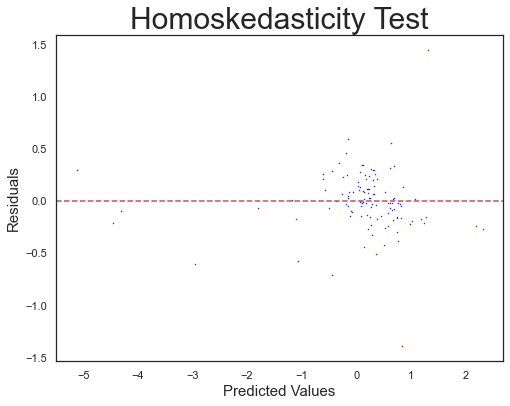

In [107]:
# Check condition 3
## Check 3a homoskedasticity - graphically or with the White-Test and Breusch-Pagan-Test
## Check 3b non-autocorrelation - Durbin-Watson-Test

# 3a - homoskedasticity
## Residuals-plot for growing variance detection
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(fittevals_pooled_OLS_cov, residuals_pooled_OLS_cov, color='blue', s=0.2)
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Values', fontsize=15)
ax.set_ylabel('Residuals', fontsize=15)
ax.set_title('Homoskedasticity Test', fontsize=30)
plt.show()

### Explanation for above figure:

The residuals-plot represents predicted values (x-axis) vs. residuals (y-axis). If the plotted data points spread out, this is an indicator for growing **variance** and thus, for **heteroskedasticity**. Since this seems to be the case, we might have the first violation.

We can check, if this is the case with the White and Breusch-Pagan-Test

In [105]:
# Breusch-Pagan-Test

## 3A.2 White-Test
from statsmodels.stats.diagnostic import het_white, het_breuschpagan

pooled_OLS_dataset = pd.concat([df, residuals_pooled_OLS_cov], axis=1)
pooled_OLS_dataset = pooled_OLS_dataset.drop(['Year'], axis=1).fillna(0)
exog = sm.tools.tools.add_constant(df['STATE_SHARE']).fillna(0)

white_test_results = het_white(pooled_OLS_dataset['residual'], exog)

labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, white_test_results)))

# 3A.3 Breusch-Pagan-Test
breusch_pagan_test_results = het_breuschpagan(pooled_OLS_dataset['residual'], exog)
labels = ['LM-Stat', 'LM p-val', 'F-Stat', 'F p-val']
print(dict(zip(labels, breusch_pagan_test_results)))

{'LM-Stat': 0.5926135392860284, 'LM p-val': 0.7435592916108589, 'F-Stat': 0.289960879680473, 'F p-val': 0.7488630048163301}
{'LM-Stat': 0.36686467932865363, 'LM p-val': 0.5447182663416702, 'F-Stat': 0.361545288511624, 'F p-val': 0.5488752684199718}


# Results

```
{'LM-Stat': 0.6721144361758606, 'LM p-val': 0.714582217618135, 'F-Stat': 0.33567228869131954, 'F p-val': 0.7148970050370612}
{'LM-Stat': 0.6648784244684034, 'LM p-val': 0.41484294066168337, 'F-Stat': 0.6644416394520123, 'F p-val': 0.4150918170595629}
```

If p < 0.05, heteroskedasticity is indicated. Here, this is not the case.

## Checking for autocorrelation

In [184]:
# 3.B Non-autocorrelation
# Durbin-Watson-Test
from statsmodels.stats.stattools import durbin_watson

durbin_watson_test_results = durbin_watson(pooled_OLS_dataset['residual'])
print(durbin_watson_test_results)

0.7428557387453103


### Durbin-Watson

Has one output between 0-4, 
* the mean (=2) would indicate that there is no autocorrelation identified
* 0-2 means positive autocorrelation (the nearer to zero the higher the correlation)
* 2-4 means negative autocorrelation (the nearer to 4 the higher the correlation)

==> The result 0.74 indicates **strong positive autocorrelation**.

===> Assumption 3b is violated, so **FE/RE model** will be more suitable.

In [118]:
# Performing FE and RE with entity effects
from linearmodels.panel import RandomEffects, PanelOLS

exog = sm.tools.tools.add_constant(df[exog_vars])
endog = df['DELTA_LOANS']
# RE model
model_re = RandomEffects(endog, exog)
re_res_new = model_re.fit()

# FE model
model_fe_new = PanelOLS(endog, exog, entity_effects=True)
fe_res_new = model_fe_new.fit()

# results
print(re_res_new)
print("-----")
print(fe_res_new)


                        RandomEffects Estimation Summary                        
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9287
Estimator:              RandomEffects   R-squared (Between):              0.6884
No. Observations:                 113   R-squared (Within):               0.9443
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9194
Time:                        23:23:24   Log-likelihood                   -15.016
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      195.32
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                   F(7,105)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             195.14
                            

New resulst

```
                        RandomEffects Estimation Summary                        
================================================================================
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9298
Estimator:              RandomEffects   R-squared (Between):              0.7034
No. Observations:                 113   R-squared (Within):               0.9445
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9210
Time:                        22:54:25   Log-likelihood                   -14.118
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      172.20
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                   F(8,104)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             172.05
                                        P-value                           0.0000
Time periods:                       7   Distribution:                   F(8,104)
Avg Obs:                       16.143                                           
Min Obs:                       5.0000                                           
Max Obs:                       23.000                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   41.649     32.062     1.2990     0.1968     -21.930      105.23
STATE_SHARE             0.1570     0.0798     1.9679     0.0517     -0.0012      0.3153
DEPOSITS_ASSETS        -0.0614     0.0941    -0.6529     0.5152     -0.2480      0.1252
PROFIT_BT_ASSETS       -0.0844     0.0227    -3.7140     0.0003     -0.1295     -0.0393
COST_TO_INCOME         -0.0449     0.0695    -0.6460     0.5197     -0.1827      0.0929
EQUITY_ASSETS           0.5565     0.3525     1.5790     0.1174     -0.1424      1.2555
LLOSS_RES_ON_GLOANS    -0.2079     0.0360    -5.7678     0.0000     -0.2794     -0.1364
SIZE                    1.0879     0.0334     32.586     0.0000      1.0217      1.1541
Year                   -0.0207     0.0160    -1.2968     0.1976     -0.0524      0.0110
=======================================================================================
-----
                          PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9464
Estimator:                   PanelOLS   R-squared (Between):              0.6006
No. Observations:                 113   R-squared (Within):               0.9464
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9135
Time:                        22:54:25   Log-likelihood                    4.7311
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      167.59
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                    F(8,76)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             167.59
                                        P-value                           0.0000
Time periods:                       7   Distribution:                    F(8,76)
Avg Obs:                       16.143                                           
Min Obs:                       5.0000                                           
Max Obs:                       23.000                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   30.501     36.480     0.8361     0.4057     -42.155      103.16
STATE_SHARE             0.1800     0.0830     2.1682     0.0333      0.0147      0.3453
DEPOSITS_ASSETS        -0.0689     0.1037    -0.6638     0.5088     -0.2755      0.1378
PROFIT_BT_ASSETS       -0.1051     0.0289    -3.6409     0.0005     -0.1626     -0.0476
COST_TO_INCOME         -0.0286     0.0729    -0.3922     0.6960     -0.1737      0.1166
EQUITY_ASSETS           1.3155     0.6027     2.1828     0.0321      0.1152      2.5158
LLOSS_RES_ON_GLOANS    -0.2117     0.0393    -5.3837     0.0000     -0.2900     -0.1334
SIZE                    1.1045     0.0351     31.509     0.0000      1.0347      1.1743
Year                   -0.0152     0.0182    -0.8360     0.4058     -0.0514      0.0210
=======================================================================================

F-test for Poolability: 1.7069
P-value: 0.0349
Distribution: F(28,76)

Included effects: Entity
```

In [90]:
import numpy.linalg as la
from scipy import stats
import numpy as np

def hausman(fe, re, df):
    """ Performs the Hausman-Test """
    b = fe.params
    B = re.params
    v_b = fe.cov
    v_B = re.cov

    df = b[np.abs(b) < 1e8].size

    chi2 = np.dot((b-B).T, la.inv(v_b - v_B).dot(b-B))

    pval = stats.chi2.sf(chi2, df)

    return chi2, df, pval

In [119]:
hausman_results = hausman(fe_res_new, re_res_new, df)
print('Chi-Squared: ', str(hausman_results[0]))
print("Degrees of freedom: ", str(hausman_results[1]))
print("p-Value: ", str(hausman_results[2]))

Chi-Squared:  12.487692891310946
Degrees of freedom:  8
p-Value:  0.13073449269571694


## Huasman interpretation

Since the p-value is very small

```
Chi-Squared:  55.709559246825116
Degrees of freedom:  14
p-Value:  6.53657138687744e-07
```

the null hypothesis can be rejected. Therefore, the FE-model seems to be the most suitable, because we have endogeneity in our model.

==> To model endogeneity we could now perform regression models like 2SLS (2 State Least Squares) in which instrument variables help to deal with endogeneity.

## Esitmating parameters with uncorrelated effects

### Random effects

In [92]:
from linearmodels.panel import RandomEffects

In [102]:
mod = RandomEffects(df.DELTA_LOANS, exog)
re_res = mod.fit()
print(re_res)

                        RandomEffects Estimation Summary                        
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9287
Estimator:              RandomEffects   R-squared (Between):              0.6884
No. Observations:                 113   R-squared (Within):               0.9443
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9194
Time:                        23:05:18   Log-likelihood                   -15.016
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      195.32
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                   F(7,105)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             195.14
                            

### Random effects output:

```
                        RandomEffects Estimation Summary                        
================================================================================
Dep. Variable:              LOG_LOANS   R-squared:                        0.8877
Estimator:              RandomEffects   R-squared (Between):              0.9267
No. Observations:                2033   R-squared (Within):               0.8175
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9241
Time:                        03:52:07   Log-likelihood                   -765.84
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1227.9
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                 F(13,2019)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             926.70
                                        P-value                           0.0000
Time periods:                       7   Distribution:                 F(13,2019)
Avg Obs:                       290.43                                           
Min Obs:                       236.00                                           
Max Obs:                       325.00                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                  -0.0320     0.2589    -0.1237     0.9016     -0.5398      0.4757
STATE_SHARE             0.0006     0.0010     0.5844     0.5590     -0.0014      0.0026
DEPOSITS_ASSETS        -0.2619     0.0855    -3.0623     0.0022     -0.4296     -0.0942
PROFIT_BT_ASSETS       -0.0251     0.0073    -3.4227     0.0006     -0.0395     -0.0107
COST_TO_INCOME         -0.0018     0.0007    -2.4938     0.0127     -0.0032     -0.0004
EQUITY_ASSETS           0.7134     0.1713     4.1646     0.0000      0.3774      1.0493
LLOSS_RES_ON_GLOANS    -0.0531     0.0017    -31.815     0.0000     -0.0564     -0.0498
SIZE                    0.9778     0.0129     75.775     0.0000      0.9525      1.0031
Year.2006               0.0491     0.0328     1.4960     0.1348     -0.0153      0.1135
Year.2007               0.1154     0.0353     3.2667     0.0011      0.0461      0.1846
Year.2008               0.2562     0.0400     6.4040     0.0000      0.1778      0.3347
Year.2009               0.2027     0.0433     4.6794     0.0000      0.1177      0.2876
Year.2010               0.1582     0.0441     3.5921     0.0003      0.0718      0.2446
Year.2011               0.2005     0.0450     4.4546     0.0000      0.1122      0.2888
=======================================================================================
```

In [101]:
# Variance decomposition
re_res.variance_decomposition

Effects                   0.015571
Residual                  0.080062
Percent due to Effects    0.162825
Name: Variance Decomposition, dtype: float64

In [95]:
# Theta determines how much demeaning takes place. When theta == 1, RE reduces to the pooled model since this occurs, when there's no variance in the effects.
## These will vary across entities, because the panel isn't balanced, i.e, there's more observations for some banks than others.
re_res.theta.head()

theta
Bank          
201   0.320679
202   0.349255
203   0.320679
204   0.349255
205   0.349255

In [110]:
from linearmodels.panel import BetweenOLS
exog_vars_be = [x for x in exog_vars if x!="Year"]
exog = sm.add_constant(df[exog_vars_be])
mod = BetweenOLS(df.DELTA_LOANS, exog)
be_res = mod.fit()
print(be_res)


                         BetweenOLS Estimation Summary                          
Dep. Variable:            DELTA_LOANS   R-squared:                        0.7556
Estimator:                 BetweenOLS   R-squared (Between):              0.7556
No. Observations:                  29   R-squared (Within):               0.8916
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.8752
Time:                        23:07:35   Log-likelihood                    7.5568
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      9.2766
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                    F(7,21)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             9.2766
                            

## Between OLS results
```
                         BetweenOLS Estimation Summary                          
================================================================================
Dep. Variable:              LOG_LOANS   R-squared:                        0.9345
Estimator:                 BetweenOLS   R-squared (Between):              0.9345
No. Observations:                 342   R-squared (Within):               0.7472
Date:                Sat, Mar 12 2022   R-squared (Overall):              0.9226
Time:                        04:45:55   Log-likelihood                   -273.24
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      680.44
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                   F(7,334)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             680.44
                                        P-value                           0.0000
Time periods:                       7   Distribution:                   F(7,334)
Avg Obs:                       290.43                                           
Min Obs:                       236.00                                           
Max Obs:                       325.00                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   1.1738     0.5583     2.1023     0.0363      0.0755      2.2720
STATE_SHARE            -0.0003     0.0018    -0.1639     0.8699     -0.0039      0.0033
DEPOSITS_ASSETS        -0.6465     0.2128    -3.0382     0.0026     -1.0650     -0.2279
PROFIT_BT_ASSETS       -0.0941     0.0301    -3.1310     0.0019     -0.1532     -0.0350
COST_TO_INCOME         -0.0106     0.0030    -3.5468     0.0004     -0.0165     -0.0047
EQUITY_ASSETS          -0.8220     0.3964    -2.0738     0.0389     -1.6018     -0.0423
LLOSS_RES_ON_GLOANS    -0.0390     0.0050    -7.7640     0.0000     -0.0489     -0.0291
SIZE                    0.9832     0.0196     50.120     0.0000      0.9446      1.0218
=======================================================================================

```

## Handling correlated effects

When effects are correlated with the regressors the RE and BE estimators are not consistent. The usual solution is to use Fixed Effects.

In [111]:
# Time invariant variables shouldn't be included when using entity effects since once demeaned, these will all be 0.
from linearmodels.panel import PanelOLS
exog_vars = [x for x in exog_vars if x!= "Year"]
exog = sm.add_constant(df[exog_vars])
mod = PanelOLS(df.DELTA_LOANS, exog, entity_effects=True)

fe_res = mod.fit()
print(fe_res)

                          PanelOLS Estimation Summary                           
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9459
Estimator:                   PanelOLS   R-squared (Between):              0.5965
No. Observations:                 113   R-squared (Within):               0.9459
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9130
Time:                        23:07:42   Log-likelihood                    4.2139
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      192.19
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                    F(7,77)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             192.19
                            

## Including fixed effects
```
                          PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9459
Estimator:                   PanelOLS   R-squared (Between):              0.5965
No. Observations:                 113   R-squared (Within):               0.9459
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9130
Time:                        23:00:30   Log-likelihood                    4.2139
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      192.19
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                    F(7,77)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             192.19
                                        P-value                           0.0000
Time periods:                       7   Distribution:                    F(7,77)
Avg Obs:                       16.143                                           
Min Obs:                       5.0000                                           
Max Obs:                       23.000                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   0.0041     0.0953     0.0427     0.9660     -0.1857      0.1938
STATE_SHARE             0.1721     0.0823     2.0907     0.0399      0.0082      0.3360
DEPOSITS_ASSETS        -0.0685     0.1035    -0.6619     0.5100     -0.2747      0.1377
PROFIT_BT_ASSETS       -0.1019     0.0286    -3.5682     0.0006     -0.1588     -0.0450
COST_TO_INCOME         -0.0322     0.0726    -0.4435     0.6586     -0.1768      0.1124
EQUITY_ASSETS           1.1846     0.5808     2.0395     0.0448      0.0280      2.3412
LLOSS_RES_ON_GLOANS    -0.2160     0.0389    -5.5495     0.0000     -0.2934     -0.1385
SIZE                    1.0967     0.0337     32.517     0.0000      1.0296      1.1639
=======================================================================================

F-test for Poolability: 1.7806
P-value: 0.0249
Distribution: F(28,77)

```

# Choosing between the models
[Source](https://towardsdatascience.com/a-guide-to-panel-data-regression-theoretics-and-implementation-with-python-4c84c5055cf8)

There are 5 assumptions for simple linear regression models that must be fulfilled. 2 of them can help us in choosing between PooledOLS and FE/RE

1. Linearity
2. Exogeneity
3a. Homoskedasticity
3b. Non-autocorrelation
4. Independent variables are not Stochastic
5. No multicollinearity

* If 2. or 3. or both are violated, FE or RE might be more suitable.
    * Choosing between FE and RE: Depends on your assumption, if the individual, unobserved *heterogeneity* is a *constant* or a *random effect*
        * ==> Can be answered by performing the Hausman-Test
            * Null hypothesis that the covariance between the independent variables (IVs) and alpha are zero. If this is the case, RE is preferred. Otherwise, FE model is preferred.





# Correlation matrix

In [82]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
def multi_collinearity_heatmap(df, figsize=(11,9)):
    """
    Creates a heatmap of correlations between featuers in the df.
    Figure size can be adjusted.
    """
    # Set style
    sns.set(style="white")

    # Create covariance matrix
    corr = df.corr()

    # Generate a mask teh size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());


C:\Users\arika\AppData\Local\Temp/ipykernel_34420/20349536.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


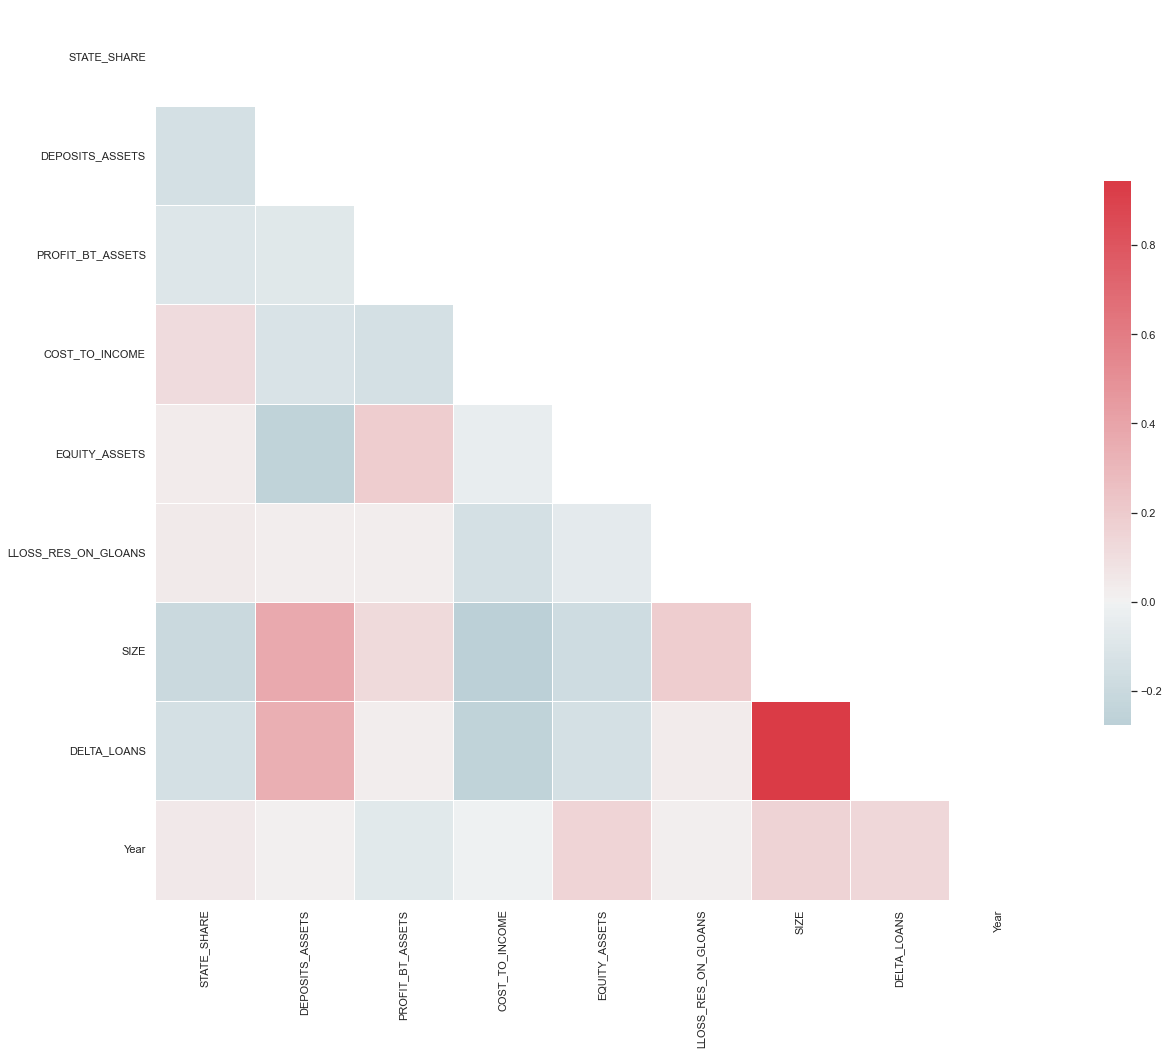

In [84]:
# One-hot encodes categorical variables
transformed_df = pd.get_dummies(df)
multi_collinearity_heatmap(transformed_df, figsize=(20,20))

C:\Users\arika\AppData\Local\Temp/ipykernel_34420/20349536.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


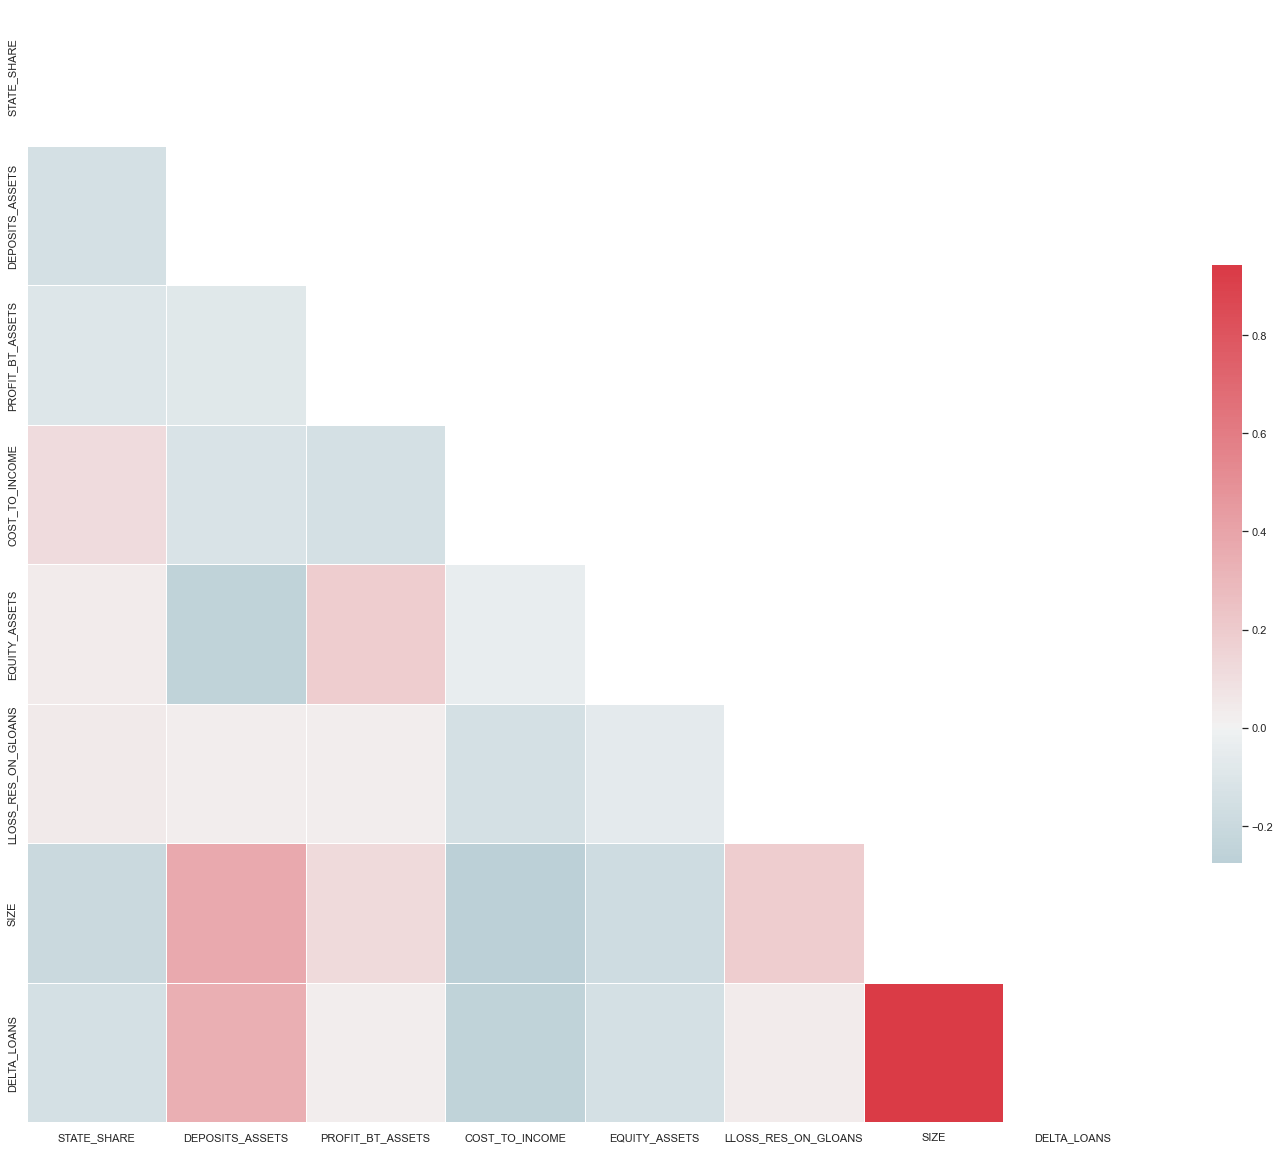

In [85]:
# Drop years to create a clearer heatmap
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('Year')]), axis=1), figsize=(25,22))


In [120]:
fe_res

PanelOLS Estimation Summary                           
================================================================================
Dep. Variable:            DELTA_LOANS   R-squared:                        0.9459
Estimator:                   PanelOLS   R-squared (Between):              0.5965
No. Observations:                 113   R-squared (Within):               0.9459
Date:                Sun, Mar 13 2022   R-squared (Overall):              0.9130
Time:                        23:07:42   Log-likelihood                    4.2139
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      192.19
Entities:                         328   P-value                           0.0000
Avg Obs:                       0.3445   Distribution:                    F(7,77)
Min Obs:                       0.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             192.19
                                        P-value                           0.0000
Time periods:                       7   Distribution:                    F(7,77)
Avg Obs:                       16.143                                           
Min Obs:                       5.0000                                           
Max Obs:                       23.000                                           
                                                                                
                                  Parameter Estimates                                  
=======================================================================================
                     Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
---------------------------------------------------------------------------------------
const                   0.0041     0.0953     0.0427     0.9660     -0.1857      0.1938
STATE_SHARE             0.1721     0.0823     2.0907     0.0399      0.0082      0.3360
DEPOSITS_ASSETS        -0.0685     0.1035    -0.6619     0.5100     -0.2747      0.1377
PROFIT_BT_ASSETS       -0.1019     0.0286    -3.5682     0.0006     -0.1588     -0.0450
COST_TO_INCOME         -0.0322     0.0726    -0.4435     0.6586     -0.1768      0.1124
EQUITY_ASSETS           1.1846     0.5808     2.0395     0.0448      0.0280      2.3412
LLOSS_RES_ON_GLOANS    -0.2160     0.0389    -5.5495     0.0000     -0.2934     -0.1385
SIZE                    1.0967     0.0337     32.517     0.0000      1.0296      1.1639
=======================================================================================

F-test for Poolability: 1.7806
P-value: 0.0249
Distribution: F(28,77)

Included effects: Entity
PanelEffectsResults, id: 0x1a429b3f790

In [121]:
# Compare different models
from linearmodels.panel import compare
print(compare({"Pooled": pooled_res, "Random Effects": re_res, "Between OLS": be_res, "Fixed Effects": fe_res, "Fixed Effects New": fe_res_new, "Random Effects New": re_res_new}))


                                                       Model Comparison                                                       
                                 Pooled    Random Effects     Between OLS   Fixed Effects Fixed Effects New Random Effects New
------------------------------------------------------------------------------------------------------------------------------
Dep. Variable               DELTA_LOANS       DELTA_LOANS     DELTA_LOANS     DELTA_LOANS       DELTA_LOANS        DELTA_LOANS
Estimator                     PooledOLS     RandomEffects      BetweenOLS        PanelOLS          PanelOLS      RandomEffects
No. Observations                    113               113              29             113               113                113
Cov. Est.                    Unadjusted        Unadjusted      Unadjusted      Unadjusted        Unadjusted         Unadjusted
R-squared                        0.9214            0.9287          0.7556          0.9459            0.9459    

# Model comparisons
* [Source](https://bashtage.github.io/linearmodels/panel/examples/examples.html#Comparing-models)

```
                                             Model Comparison                                            
=========================================================================================================
                                Pooled    Random Effects    Between OLS  Fixed Effects Random Effects New
---------------------------------------------------------------------------------------------------------
Dep. Variable                LOG_LOANS         LOG_LOANS      LOG_LOANS      LOG_LOANS          LOG_LOANS
Estimator                    PooledOLS     RandomEffects     BetweenOLS       PanelOLS      RandomEffects
No. Observations                  2033              2033            342           2033               2033
Cov. Est.                   Unadjusted        Unadjusted     Unadjusted     Unadjusted         Unadjusted
R-squared                       0.9274            0.8877         0.9345         0.8187             0.8877
R-Squared (Within)              0.8034            0.8175         0.7472         0.8187             0.8175
R-Squared (Between)             0.9328            0.9267         0.9345         0.9201             0.9267
R-Squared (Overall)             0.9274            0.9241         0.9226         0.9187             0.9241
F-statistic                     1984.6            1227.9         680.44         582.98             1227.9
P-value (F-stat)                0.0000            0.0000         0.0000         0.0000             0.0000
=====================     ============   ===============   ============   ============    ===============
const                           0.2251           -0.0320         1.1738         0.7116            -0.0320
                              (1.1318)         (-0.1237)       (2.1023)       (1.8114)          (-0.1237)
STATE_SHARE                    -0.0002            0.0006        -0.0003         0.0007             0.0006
                             (-0.2616)          (0.5844)      (-0.1639)       (0.5606)           (0.5844)
DEPOSITS_ASSETS                -0.4799           -0.2619        -0.6465        -0.2116            -0.2619
                             (-5.7584)         (-3.0623)      (-3.0382)      (-2.2732)          (-3.0623)
PROFIT_BT_ASSETS               -0.0575           -0.0251        -0.0941        -0.0198            -0.0251
                             (-5.8556)         (-3.4227)      (-3.1310)      (-2.6321)          (-3.4227)
COST_TO_INCOME                 -0.0054           -0.0018        -0.0106        -0.0014            -0.0018
                             (-5.5257)         (-2.4938)      (-3.5468)      (-1.8658)          (-2.4938)
EQUITY_ASSETS                  -0.2281            0.7134        -0.8220         0.8925             0.7134
                             (-1.3727)          (4.1646)      (-2.0738)       (4.5108)           (4.1646)
LLOSS_RES_ON_GLOANS            -0.0463           -0.0531        -0.0390        -0.0546            -0.0531
                             (-24.647)         (-31.815)      (-7.7640)      (-31.013)          (-31.815)
SIZE                            0.9971            0.9778         0.9832         0.9306             0.9778
                              (122.30)          (75.775)       (50.120)       (45.267)           (75.775)
Year.2006                       0.0075            0.0491                        0.0875             0.0491
                              (0.1389)          (1.4960)                      (2.5421)           (1.4960)
Year.2007                       0.0529            0.1154                        0.1843             0.1154
                              (0.9928)          (3.2667)                      (4.5598)           (3.2667)
Year.2008                       0.2457            0.2562                        0.3141             0.2562
                              (4.1735)          (6.4040)                      (7.0518)           (6.4040)
Year.2009                       0.1490            0.2027                        0.2737             0.2027
                              (2.4274)          (4.6794)                      (5.5812)           (4.6794)
Year.2010                       0.0917            0.1582                        0.2427             0.1582
                              (1.5026)          (3.5921)                      (4.7588)           (3.5921)
Year.2011                       0.1403            0.2005                        0.2931             0.2005
                              (2.2837)          (4.4546)                      (5.5395)           (4.4546)
======================= ============== ================= ============== ==============  =================
Effects                                                                         Entity                   
---------------------------------------------------------------------------------------------------------

T-stats reported in parentheses
```

## Descriptive statistics
* [Example](https://towardsdatascience.com/working-with-multi-index-pandas-dataframes-f64d2e2c3e02)

In [16]:
df_desc = df.copy()

In [ ]:
# Group by and get means
df_desc = df_desc.groupby([''])

In [10]:
print(df.describe)

<bound method NDFrame.describe of            STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
Bank Year                                                             
201  2005    63.760000  6.209636e+07  8.731443e+07         0.830049   
     2006    63.800000  9.652529e+07  1.316570e+08         0.828939   
     2007    60.300000  1.597618e+08  2.007972e+08         0.803022   
     2008    61.580000  1.728323e+08  2.292849e+08         0.756741   
     2009    60.750000  1.608252e+08  2.349233e+08         0.790621   
     2010    60.300000  1.801163e+08  2.831169e+08         0.806509   
     2011    60.300000  2.397713e+08  3.365345e+08         0.803734   
202  2005    99.900000  2.033875e+07  3.748806e+07         0.615941   
     2006    99.900000  3.264960e+07  5.847458e+07         0.613496   
     2007    77.500000  7.008009e+07  1.108400e+08         0.560334   
     2008    77.470000  8.698316e+07  1.258458e+08         0.403121   
     2009    85.500000  7.637497e+07  1.193

In [8]:
import statsmodels.api as sm
from linearmodels.panel import PooledOLS

In [9]:
exog_vars = ["LOANS", "ASSETS", "DEPOSITS_ASSETS", "PROFIT_BT_ASSETS", "COST_TO_INCOME", "EQUITY_ASSETS", "STATE_SHARE"]
exog = sm.add_constant(df[exog_vars])
mod = PooledOLS(df.DELTA_LOANS, exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:            STATE_SHARE   R-squared:                        0.1131
Estimator:                  PooledOLS   R-squared (Between):              0.1321
No. Observations:                2033   R-squared (Within):              -0.1680
Date:                Thu, Mar 10 2022   R-squared (Overall):              0.1131
Time:                        11:07:48   Log-likelihood                   -8631.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      43.072
Entities:                         342   P-value                           0.0000
Avg Obs:                       5.9444   Distribution:                  F(6,2026)
Min Obs:                       1.0000                                           
Max Obs:                       7.0000   F-statistic (robust):             43.072
                            

In [10]:
df.describe

<bound method NDFrame.describe of            STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
Bank Year                                                             
201  2005        63.76  6.209636e+07  8.731443e+07         0.830049   
     2006        63.80  9.652529e+07  1.316570e+08         0.828939   
     2007        60.30  1.597618e+08  2.007972e+08         0.803022   
     2008        61.58  1.728323e+08  2.292849e+08         0.756741   
     2009        60.75  1.608252e+08  2.349233e+08         0.790621   
...                ...           ...           ...              ...   
547  2010         0.00  4.750348e+04  3.867721e+05         0.732015   
548  2008         0.00  4.584689e+04  3.056119e+05         0.414634   
     2009         0.00  3.274292e+04  2.799145e+05         0.335238   
     2010         0.00  3.412420e+04  3.199472e+05         0.429700   
     2011         0.00  8.429592e+04  4.002969e+05         0.592644   

           PROFIT_BT_ASSETS  COST_TO_INCOM

In [25]:
df

Bank  Year  STATE_SHARE         LOANS        ASSETS  DEPOSITS_ASSETS  \
0      201  2005        63.76  6.209636e+07  8.731443e+07         0.830049   
1      201  2006        63.80  9.652529e+07  1.316570e+08         0.828939   
2      201  2007        60.30  1.597618e+08  2.007972e+08         0.803022   
3      201  2008        61.58  1.728323e+08  2.292849e+08         0.756741   
4      201  2009        60.75  1.608252e+08  2.349233e+08         0.790621   
...    ...   ...          ...           ...           ...              ...   
2028   547  2010         0.00  4.750348e+04  3.867721e+05         0.732015   
2029   548  2008         0.00  4.584689e+04  3.056119e+05         0.414634   
2030   548  2009         0.00  3.274292e+04  2.799145e+05         0.335238   
2031   548  2010         0.00  3.412420e+04  3.199472e+05         0.429700   
2032   548  2011         0.00  8.429592e+04  4.002969e+05         0.592644   

      PROFIT_BT_ASSETS  COST_TO_INCOME  EQUITY_ASSETS  LLOSS_RES_ON_GLOANS  
0             3.486552          51.613       0.091945                4.950  
1             3.144802          54.839       0.088997                3.817  
2             2.835351          55.434       0.129280                2.764  
3             1.928618          49.997       0.130086                3.831  
4             0.420320          34.302       0.127377               10.651  
...                ...             ...            ...                  ...  
2028          1.515302          92.842       0.049501               32.124  
2029          1.403274          92.746       0.360396               17.615  
2030          0.607977          99.060       0.395550               23.347  
2031          2.133115          88.419       0.344067               23.754  
2032          1.179392          90.793       0.265673               11.854  

[2033 rows x 10 columns]

In [26]:
df = df.pivot_table(
    values=[
        'STATE_SHARE',
        'LOANS', 'ASSETS',
        'DEPOSITS_ASSETS',
        'PROFIT_BT_ASSETS',
        'COST_TO_INCOME',
        'EQUITY_ASSETS',
        'LLOSS_RES_ON_GLOANS'
    ],
    index='Year',
    columns='Bank'
   
)

In [27]:
df

ASSETS                                                          \
Bank           201           202           203           204           205   
Year                                                                         
2005  8.731443e+07  3.748806e+07  1.534537e+07  1.981583e+06  1.791255e+06   
2006  1.316570e+08  5.847458e+07  2.942247e+07  7.009984e+06  6.040211e+06   
2007  2.007972e+08  1.108400e+08  3.864236e+07  1.452201e+07  1.301166e+07   
2008  2.292849e+08  1.258458e+08           NaN  2.427176e+07  2.030201e+07   
2009  2.349233e+08  1.193882e+08  5.756945e+07  2.746523e+07  2.357387e+07   
2010  2.831169e+08  1.407919e+08  6.403607e+07  3.054116e+07  2.966368e+07   
2011  3.365345e+08  2.108827e+08  7.695553e+07  3.989384e+07  3.655694e+07   

                                                                            \
Bank           207           208           209           210           211   
Year                                                                         
2005  8.538849e+06           NaN  7.402297e+06  2.971149e+06  4.694603e+06   
2006  1.450596e+07  9.376737e+06  1.115926e+07  4.158759e+06  1.136357e+07   
2007  2.151397e+07  1.499015e+07  1.662429e+07  8.107161e+06  1.809779e+07   
2008  2.727619e+07  2.027746e+07  1.724119e+07  9.455120e+06  2.107935e+07   
2009  2.728490e+07  1.594730e+07  1.525955e+07  9.162454e+06  1.695057e+07   
2010           NaN  1.886696e+07  1.491697e+07  1.739733e+07  1.667836e+07   
2011  3.292353e+07  2.397734e+07  2.315532e+07  2.056597e+07  1.879378e+07   

      ... STATE_SHARE                                               
Bank  ...         539  540  541  542  543  544  545  546  547  548  
Year  ...                                                           
2005  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  
2006  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  
2007  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  
2008  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2009  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2010  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2011  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  0.0  

[7 rows x 2736 columns]

In [28]:
years = df.index.get_level_values('Year').to_list()

In [30]:
df['Year'] = pd.Categorical(years)

In [31]:
df

ASSETS                                                          \
Bank           201           202           203           204           205   
Year                                                                         
2005  8.731443e+07  3.748806e+07  1.534537e+07  1.981583e+06  1.791255e+06   
2006  1.316570e+08  5.847458e+07  2.942247e+07  7.009984e+06  6.040211e+06   
2007  2.007972e+08  1.108400e+08  3.864236e+07  1.452201e+07  1.301166e+07   
2008  2.292849e+08  1.258458e+08           NaN  2.427176e+07  2.030201e+07   
2009  2.349233e+08  1.193882e+08  5.756945e+07  2.746523e+07  2.357387e+07   
2010  2.831169e+08  1.407919e+08  6.403607e+07  3.054116e+07  2.966368e+07   
2011  3.365345e+08  2.108827e+08  7.695553e+07  3.989384e+07  3.655694e+07   

                                                                            \
Bank           207           208           209           210           211   
Year                                                                         
2005  8.538849e+06           NaN  7.402297e+06  2.971149e+06  4.694603e+06   
2006  1.450596e+07  9.376737e+06  1.115926e+07  4.158759e+06  1.136357e+07   
2007  2.151397e+07  1.499015e+07  1.662429e+07  8.107161e+06  1.809779e+07   
2008  2.727619e+07  2.027746e+07  1.724119e+07  9.455120e+06  2.107935e+07   
2009  2.728490e+07  1.594730e+07  1.525955e+07  9.162454e+06  1.695057e+07   
2010           NaN  1.886696e+07  1.491697e+07  1.739733e+07  1.667836e+07   
2011  3.292353e+07  2.397734e+07  2.315532e+07  2.056597e+07  1.879378e+07   

      ... STATE_SHARE                                          Year  
Bank  ...         540  541  542  543  544  545  546  547  548        
Year  ...                                                            
2005  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  2005  
2006  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  2006  
2007  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  2007  
2008  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2008  
2009  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2009  
2010  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  2010  
2011  ...         0.0  0.0  0.0  0.0  0.0  0.0  0.0  NaN  0.0  2011  

[7 rows x 2737 columns]

In [32]:
from linearmodels import PooledOLS
import statsmodels.api as sm

In [35]:
exog = sm.tools.tools.add_constant(df['STATE_SHARE'])
endog = df['LOANS']
mod = PooledOLS(endog, exog)
pooledOLS_res = mod.fit(cov_type='clustered', cluster_entity=True)

# Store values for checking homoskedasticity graphically
fittedvals_pooled_OLS = pooledOLS_res.predict().fitted_values
residuals_pooled_OLS = pooledOLS_res.resids

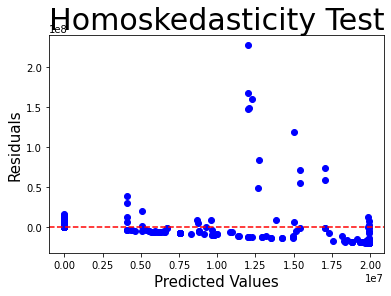

In [37]:
# 3A. Homoskedasticity
import matplotlib.pyplot as plt
 # 3A.1 Residuals-Plot for growing Variance Detection
fig, ax = plt.subplots()
ax.scatter(fittedvals_pooled_OLS, residuals_pooled_OLS, color = 'blue')
ax.axhline(0, color = 'r', ls = '--')
ax.set_xlabel('Predicted Values', fontsize = 15)
ax.set_ylabel('Residuals', fontsize = 15)
ax.set_title('Homoskedasticity Test', fontsize = 30)
plt.show()

In [14]:
dataset = pd.read_csv(
    'RIFA-Data2016.csv',
    usecols=[
        'STATE_SHARE',
        'LOANS', 'ASSETS',
        'DEPOSITS_ASSETS',
        'PROFIT_BT_ASSETS',
        'COST_TO_INCOME',
        'EQUITY_ASSETS',
        'LLOSS_RES_ON_GLOANS'
    ], index_col=['Bank', 'Year']
)


In [15]:
dataset

Bank  Year  STATE_SHARE           LOANS          ASSETS  \
0      201  2005        63.76   62 096 356.32   87 314 430.88   
1      201  2006        63.80   96 525 286.64  131 656 974.68   
2      201  2007        60.30  159 761 834.08  200 797 187.11   
3      201  2008        61.58  172 832 301.67  229 284 904.45   
4      201  2009        60.75  160 825 246.60  234 923 254.31   
...    ...   ...          ...             ...             ...   
2028   547  2010         0.00       47 503.48      386 772.06   
2029   548  2008         0.00       45 846.89      305 611.91   
2030   548  2009         0.00       32 742.92      279 914.51   
2031   548  2010         0.00       34 124.20      319 947.23   
2032   548  2011         0.00       84 295.92      400 296.92   

      DEPOSITS_ASSETS  PROFIT_BT_ASSETS  COST_TO_INCOME  EQUITY_ASSETS  \
0                0.83              3.49           51.61           0.09   
1                0.83              3.14           54.84           0.09   
2                0.80              2.84           55.43           0.13   
3                0.76              1.93           50.00           0.13   
4                0.79              0.42           34.30           0.13   
...               ...               ...             ...            ...   
2028             0.73              1.52           92.84           0.05   
2029             0.41              1.40           92.75           0.36   
2030             0.34              0.61           99.06           0.40   
2031             0.43              2.13           88.42           0.34   
2032             0.59              1.18           90.79           0.27   

      LLOSS_RES_ON_GLOANS  
0                    4.95  
1                    3.82  
2                    2.76  
3                    3.83  
4                   10.65  
...                   ...  
2028                32.12  
2029                17.62  
2030                23.35  
2031                23.75  
2032                11.85  

[2033 rows x 10 columns]